In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import pandas as pd
import numpy as np
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *
import numpy as np
from glob import glob
import tensorflow as tf 

In [2]:
df=pd.read_csv('reported_numbers.csv')
folder=(os.listdir(r"C:\Users\ibuku\Music\archive (9)\cell_images\cell_images"))

In [3]:
folder

['Parasitized', 'Uninfected']

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
BASE_DATASET_FOLDER=r'C:\Users\ibuku\Downloads\archive (3)\Dataset'
train_path = r'C:\Users\ibuku\Downloads\archive (3)\Dataset\Train'
valid_path = r'C:\Users\ibuku\Downloads\archive (3)\Dataset\Test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
df

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe
...,...,...,...,...,...
1939,Venezuela (Bolivarian Republic of),2000,29736.0,24.0,Americas
1940,Viet Nam,2000,74316.0,142.0,Western Pacific
1941,Yemen,2000,1394495.0,NaN,Eastern Mediterranean
1942,Zambia,2000,NaN,NaN,Africa


In [8]:
df.columns

Index(['Country', 'Year', 'No. of cases', 'No. of deaths', 'WHO Region'], dtype='object')

In [9]:
df.shape

(1944, 5)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [12]:
df.describe()

,Year,No. of cases,No. of deaths
count,1554.000000,1.554000e+03,1554.000000
mean,2009.164736,3.986576e+05,1021.113256
std,4.974230,1.263739e+06,3584.940157
min,2000.000000,0.000000e+00,0.000000
25%,2005.000000,8.497500e+02,0.000000
50%,2009.000000,1.649550e+04,22.500000
75%,2013.000000,1.270970e+05,495.500000
max,2017.000000,1.533084e+07,51842.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 0 to 1940
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1554 non-null   object 
 1   Year           1554 non-null   int64  
 2   No. of cases   1554 non-null   float64
 3   No. of deaths  1554 non-null   float64
 4   WHO Region     1554 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 72.8+ KB


In [14]:
df.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [15]:
df.Year.value_counts()

2013    101
2014     99
2015     98
2012     98
2010     98
2016     98
2011     97
2009     94
2008     92
2007     87
2006     86
2017     85
2005     84
2004     76
2003     68
2001     68
2002     67
2000     58
Name: Year, dtype: int64

In [16]:
df1 = df.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()
df1.head()

C:\Users\ibuku\AppData\Local\Temp\ipykernel_15484\478635203.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby('Country')["No. of cases","No. of deaths"].sum().reset_index()


,Country,No. of cases,No. of deaths
0,Afghanistan,1045271.0,363.0
1,Algeria,1044.0,4.0
2,Angola,26006152.0,125364.0
3,Argentina,2098.0,2.0
4,Armenia,355.0,0.0


In [17]:
df2 = df1[["Country","No. of cases"]]
df2.head()


,Country,No. of cases
0,Afghanistan,1045271.0
1,Algeria,1044.0
2,Angola,26006152.0
3,Argentina,2098.0
4,Armenia,355.0


In [18]:
df2 = df2.sort_values("No. of cases", ascending = False)

In [19]:
#the following function allows me to print the data on the top of my bars
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches:
        axis.annotate ("{0:.1f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

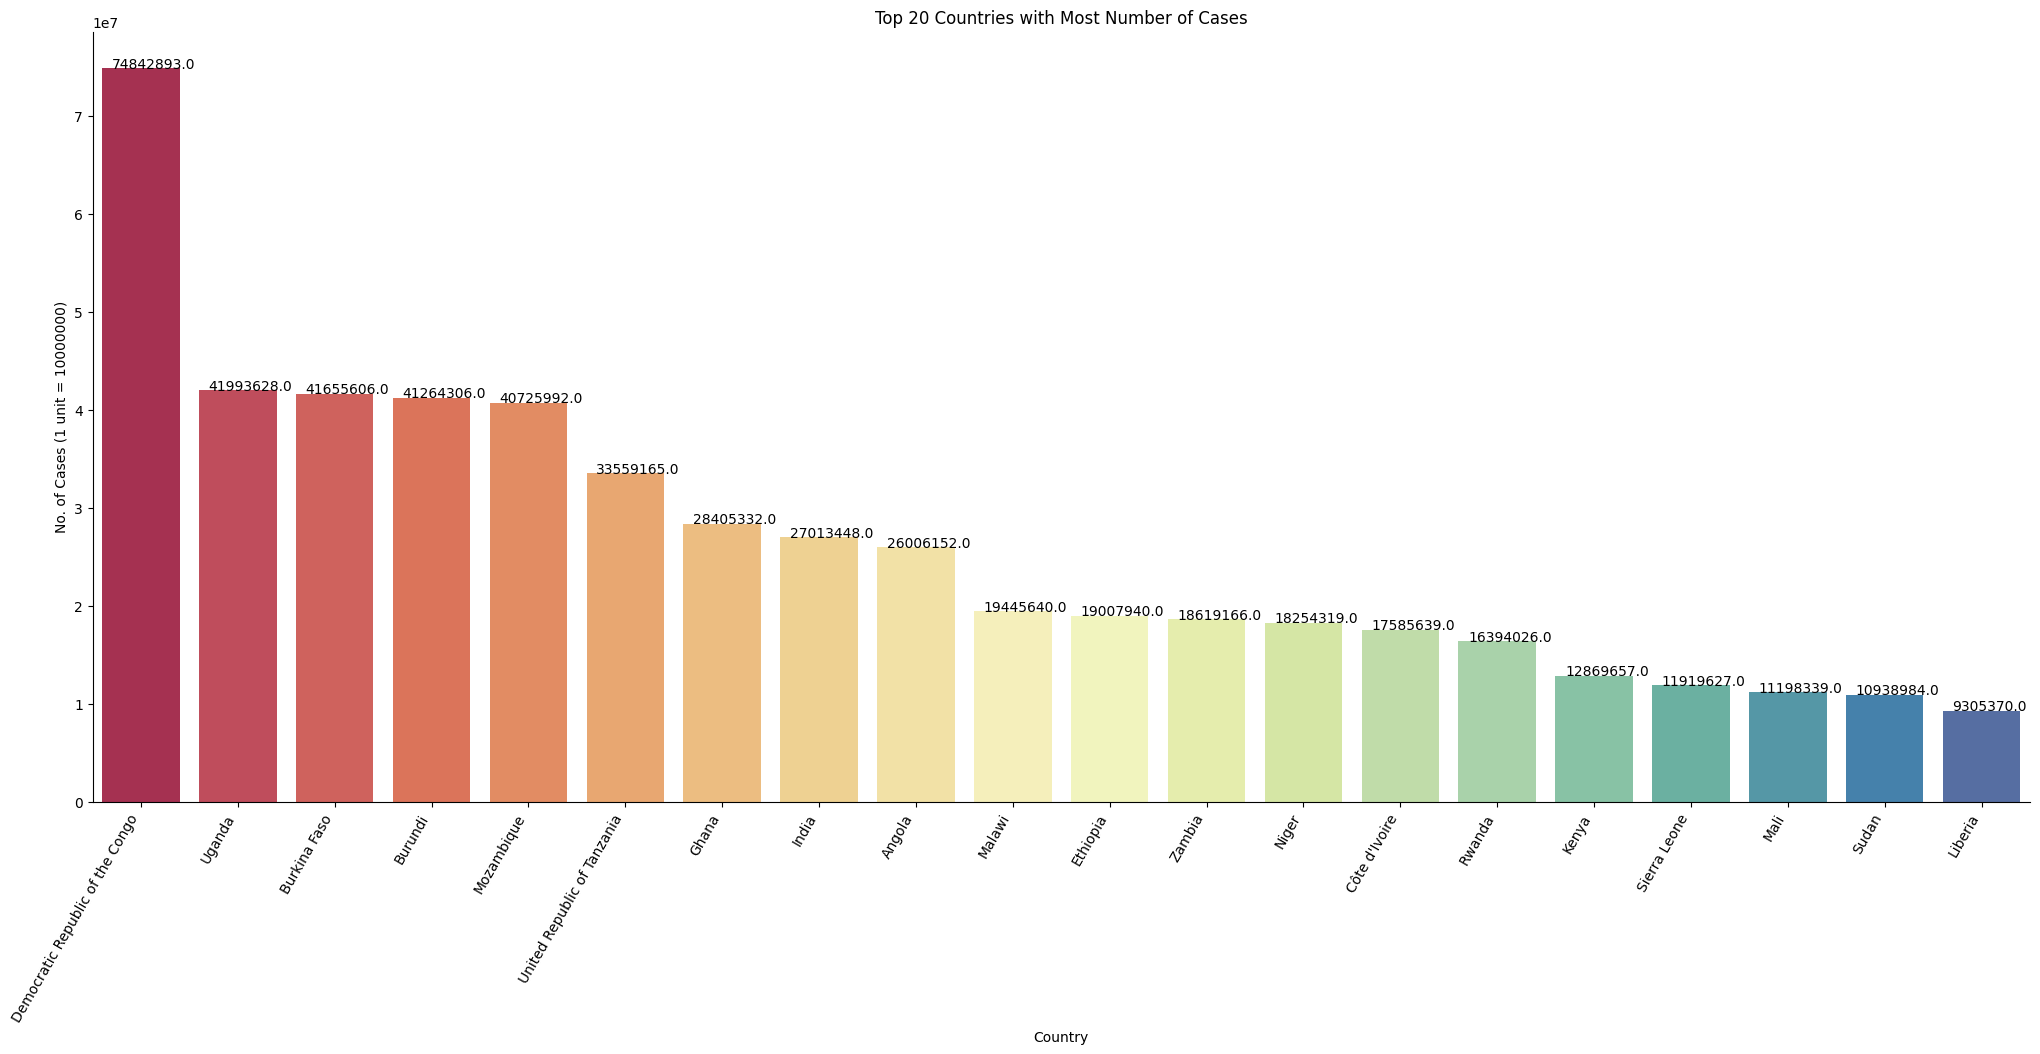

In [20]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of cases", data=df2[:20] ,palette = "Spectral")
plt.title ("Top 20 Countries with Most Number of Cases")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [21]:
df3 = df1[["Country","No. of deaths"]]
df3.head()

,Country,No. of deaths
0,Afghanistan,363.0
1,Algeria,4.0
2,Angola,125364.0
3,Argentina,2.0
4,Armenia,0.0


In [22]:
df3 = df3.sort_values("No. of deaths", ascending = False)

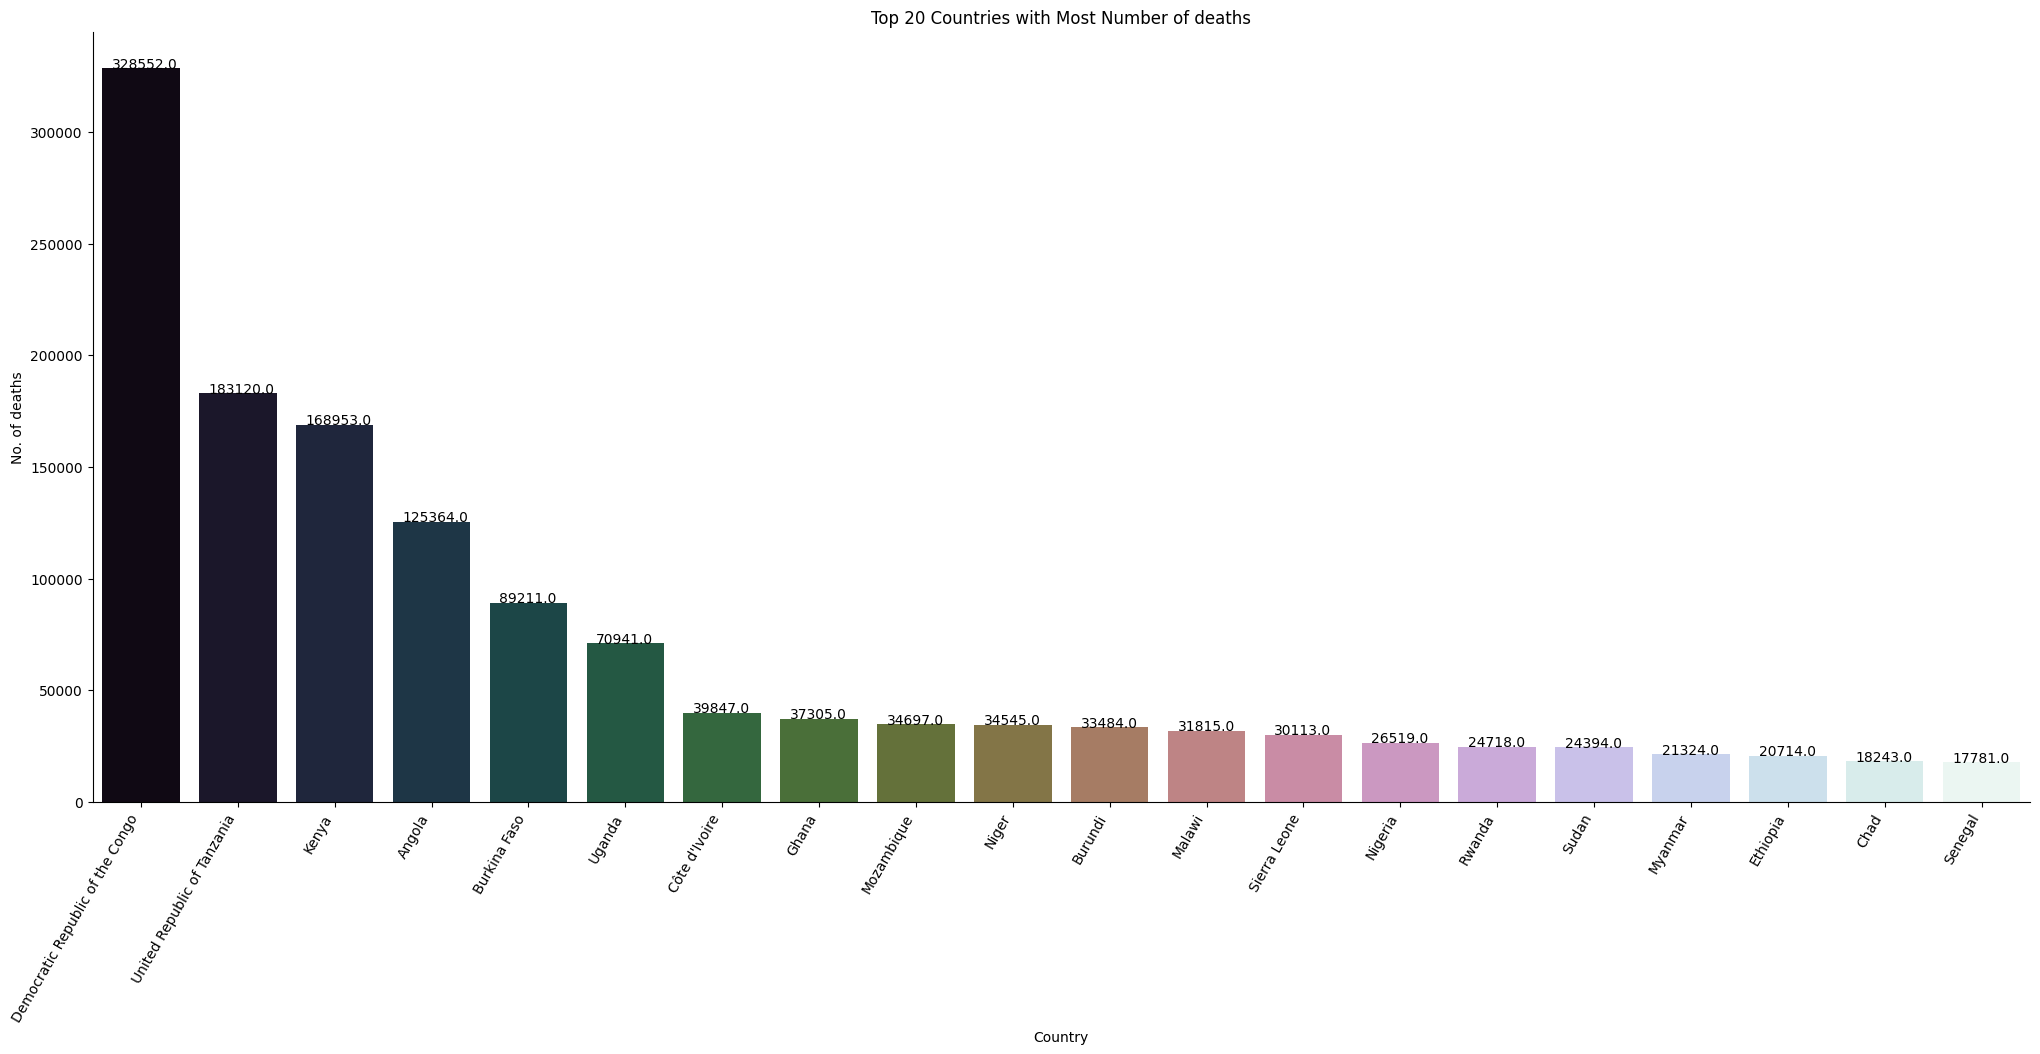

In [23]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="Country", y= "No. of deaths", data=df3[:20] ,palette = "cubehelix")
plt.title ("Top 20 Countries with Most Number of deaths")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of deaths")
data_graph(ax,0.1,10)
plt.show()

In [24]:
df4 = df.groupby("WHO Region")["No. of cases","No. of deaths"].sum().reset_index()
df4.head()

C:\Users\ibuku\AppData\Local\Temp\ipykernel_15484\582275661.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = df.groupby("WHO Region")["No. of cases","No. of deaths"].sum().reset_index()


,WHO Region,No. of cases,No. of deaths
0,Africa,545111852.0,1480850.0
1,Americas,13433321.0,11039.0
2,Eastern Mediterranean,15841260.0,26764.0
3,Europe,112675.0,25.0
4,South-East Asia,38305249.0,49802.0


In [25]:
df5 = df4[["WHO Region","No. of cases"]]
df5.head()

,WHO Region,No. of cases
0,Africa,545111852.0
1,Americas,13433321.0
2,Eastern Mediterranean,15841260.0
3,Europe,112675.0
4,South-East Asia,38305249.0


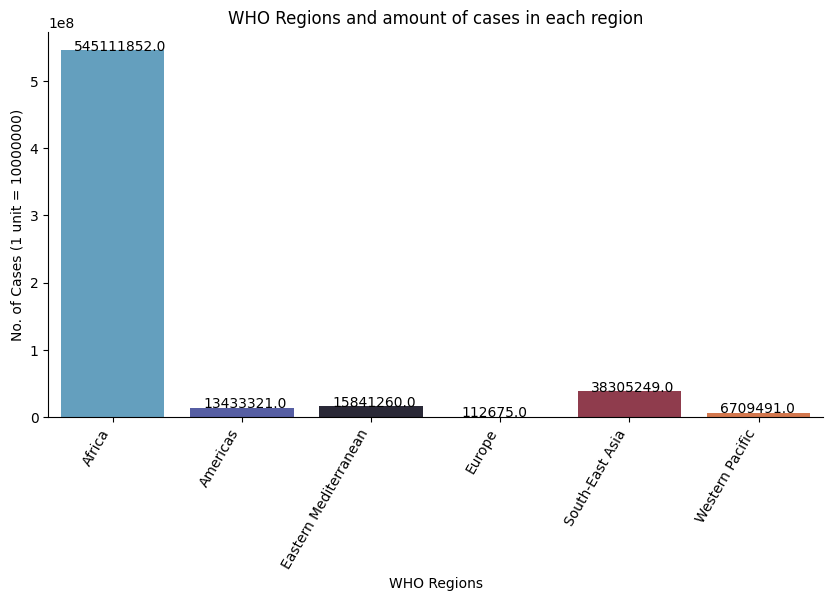

In [26]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of cases", data=df5 ,palette = "icefire")
plt.title ("WHO Regions and amount of cases in each region")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of Cases (1 unit = 10000000)")
data_graph(ax,0.1,10)
plt.show()

In [27]:
df6 = df4[["WHO Region","No. of deaths"]]
df6.head()


,WHO Region,No. of deaths
0,Africa,1480850.0
1,Americas,11039.0
2,Eastern Mediterranean,26764.0
3,Europe,25.0
4,South-East Asia,49802.0


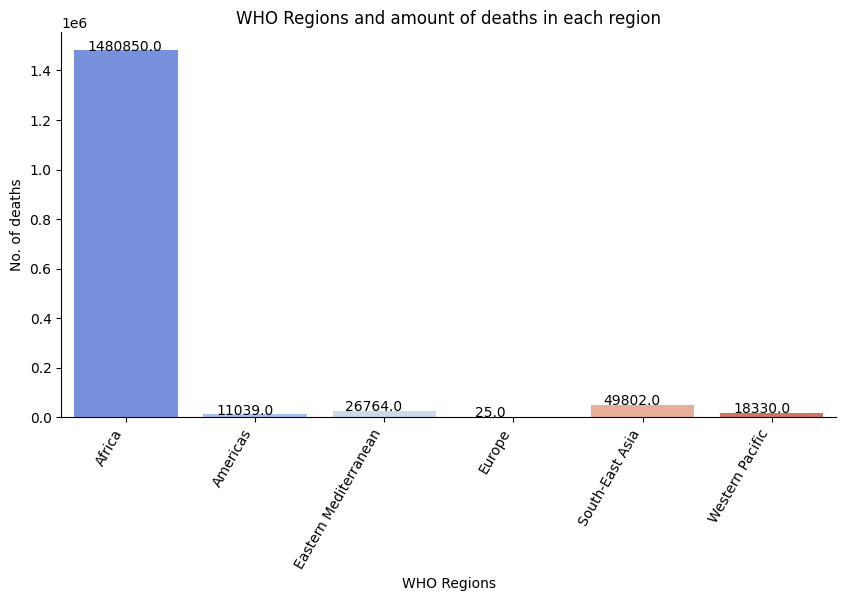

In [28]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="WHO Region", y= "No. of deaths", data=df6 ,palette = "coolwarm")
plt.title ("WHO Regions and amount of deaths in each region")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("WHO Regions")
plt.ylabel("No. of deaths")
data_graph(ax,0.1,10)
plt.show()

In [29]:
df7 = df.groupby("Year")["No. of cases","No. of deaths"].sum().reset_index()
df7.head()

C:\Users\ibuku\AppData\Local\Temp\ipykernel_15484\270440505.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df7 = df.groupby("Year")["No. of cases","No. of deaths"].sum().reset_index()


,Year,No. of cases,No. of deaths
0,2000,5279182.0,21419.0
1,2001,5534764.0,26162.0
2,2002,5335247.0,70683.0
3,2003,8243454.0,91247.0
4,2004,9389638.0,87926.0


In [30]:
df8 = df7.set_index(["Year"])

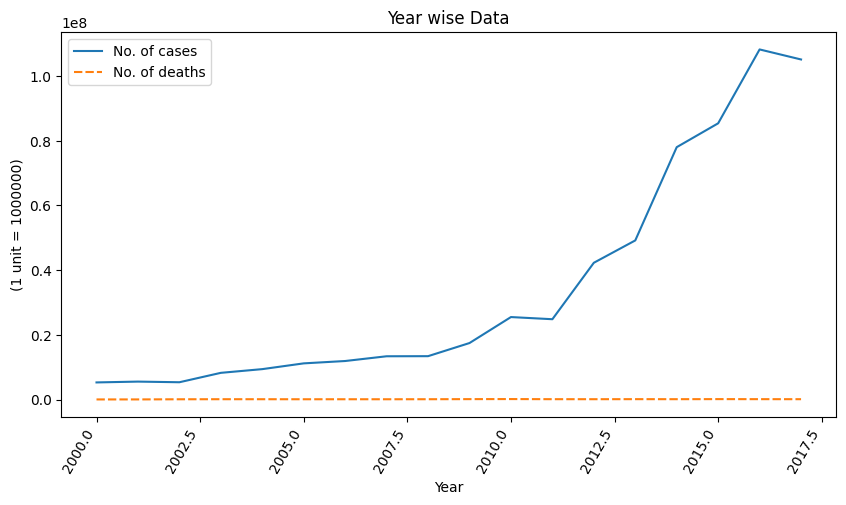

In [31]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(data=df8)
plt.title ("Year wise Data")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("(1 unit = 1000000)")
plt.show()

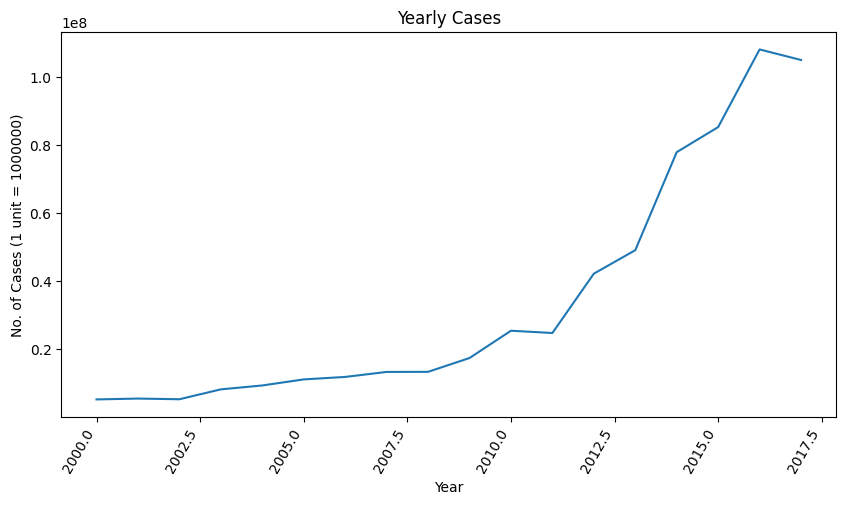

In [32]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of cases",data=df7)
plt.title ("Yearly Cases")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of Cases (1 unit = 1000000)")
plt.show()

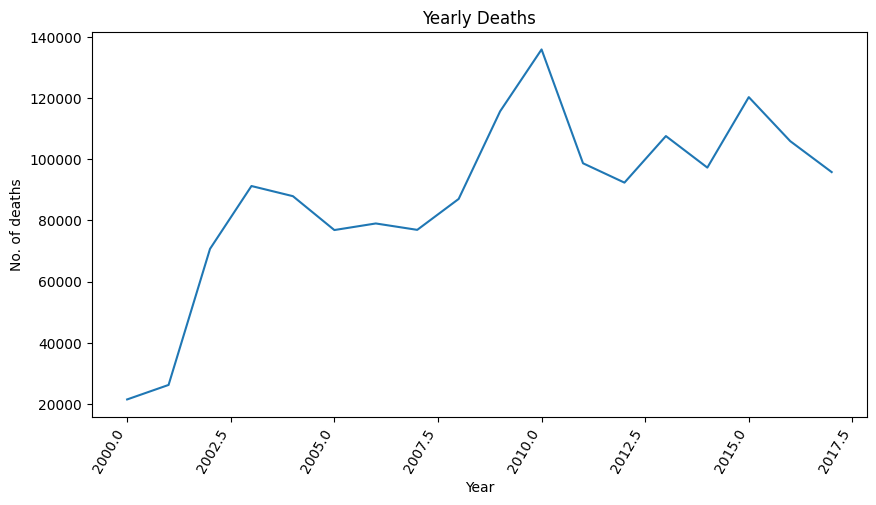

In [33]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "Year",y= "No. of deaths",data=df7)
plt.title ("Yearly Deaths")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of deaths")
plt.show()

In [34]:
pred_df1 = df['Country'].str.get_dummies()
pred_df2 = df['WHO Region'].str.get_dummies()

In [35]:
frames = [df,pred_df1,pred_df2]
pred_df = pd.concat(frames,axis=1)
pred_df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region,Afghanistan,Algeria,Angola,Argentina,Armenia,...,Viet Nam,Yemen,Zambia,Zimbabwe,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Algeria,2017,0.0,0.0,Africa,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Angola,2017,3874892.0,13967.0,Africa,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Argentina,2017,0.0,1.0,Americas,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Bangladesh,2017,4893.0,13.0,South-East Asia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
cols = ["Country","WHO Region"]
pred_df.drop(columns = cols, inplace=True)
pred_df.shape

(1554, 114)

In [37]:
x = pred_df.drop("No. of deaths",axis=1)
y = pred_df[["No. of deaths"]]
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1087, 113)
x_test : (467, 113)
y_train : (1087, 1)
y_test : (467, 1)


In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

C:\Users\ibuku\AppData\Local\Temp\ipykernel_15484\451284859.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [39]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.9047972141673495


In [40]:
x = pred_df.drop("No. of deaths",axis=1)
y = pred_df[["No. of deaths"]]

from sklearn import preprocessing
x = preprocessing.normalize(x)
y = preprocessing.normalize(y)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

C:\Users\ibuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [43]:
knn.score(x_test,y_test)


0.8394004282655246

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[101,  26],
       [ 49, 291]], dtype=int64)

In [45]:
import math
tn = con_mat[0][0]
fn = con_mat[1][0]
fp = con_mat[0][1]
tp = con_mat[1][1]

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(fp+tp)
recall = tp/(fn+tp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f1 = 2*(precision*recall)/(precision+recall)
fpr = fp/(tn+fp)
fnr = fn/(tp+fn)
npv = tn/(tn+fn)
fdr = fp/(fp+tp)
mcc = (tp*tn)-(fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

print("Precision = {}, Accuracy = {}, F1 = {}, FPR = {}, FNR = {}, NPV = {}, FDR = {}, MCC = {}".format(precision,accuracy,f1,fpr,fnr,npv,fdr,mcc))
print()
print ("Sensitivity = {}, Specificity = {}".format(sensitivity, specificity))


Precision = 0.917981072555205, Accuracy = 0.8394004282655246, F1 = 0.8858447488584474, FPR = 0.2047244094488189, FNR = 0.14411764705882352, NPV = 0.6733333333333333, FDR = 0.08201892744479496, MCC = 29390.97188404443

Sensitivity = 0.8558823529411764, Specificity = 0.7952755905511811


In [46]:
x = pred_df.drop("No. of deaths",axis=1)
y = pred_df[["No. of deaths"]]

from sklearn import preprocessing
x = preprocessing.normalize(x)
y = preprocessing.normalize(y)


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [48]:
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc

model = SGDClassifier(loss='hinge', class_weight='balanced')
model.fit(x_train, y_train)

y_train_pred = model.decision_function(x_train)    
y_test_pred = model.decision_function(x_test) 

C:\Users\ibuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


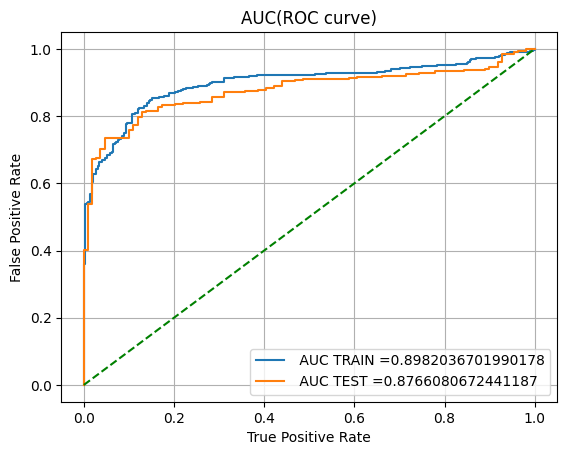

In [49]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [50]:
import itertools
#import imutils
import matplotlib.pyplot as plt
from keras.applications import VGG16
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.model_selection import train_test_split 
from keras.preprocessing import image
from keras.models import Model,Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop,Adam 
from keras.preprocessing.image import ImageDataGenerator
import shutil

In [51]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [52]:
prediction = Dense(len(folder), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [53]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [55]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [56]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [57]:
training_set

In [58]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [59]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


In [60]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [61]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [62]:
WIDTH = 151
HEIGHT = 136
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 30
NEW_SIZE = 136

In [63]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=train_path,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 416 files belonging to 2 classes.


In [64]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=valid_path ,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 134 files belonging to 2 classes.


In [65]:
classnames = train_dataset.class_names
classnames

['Parasite', 'Uninfected']

## Plotting Some Images

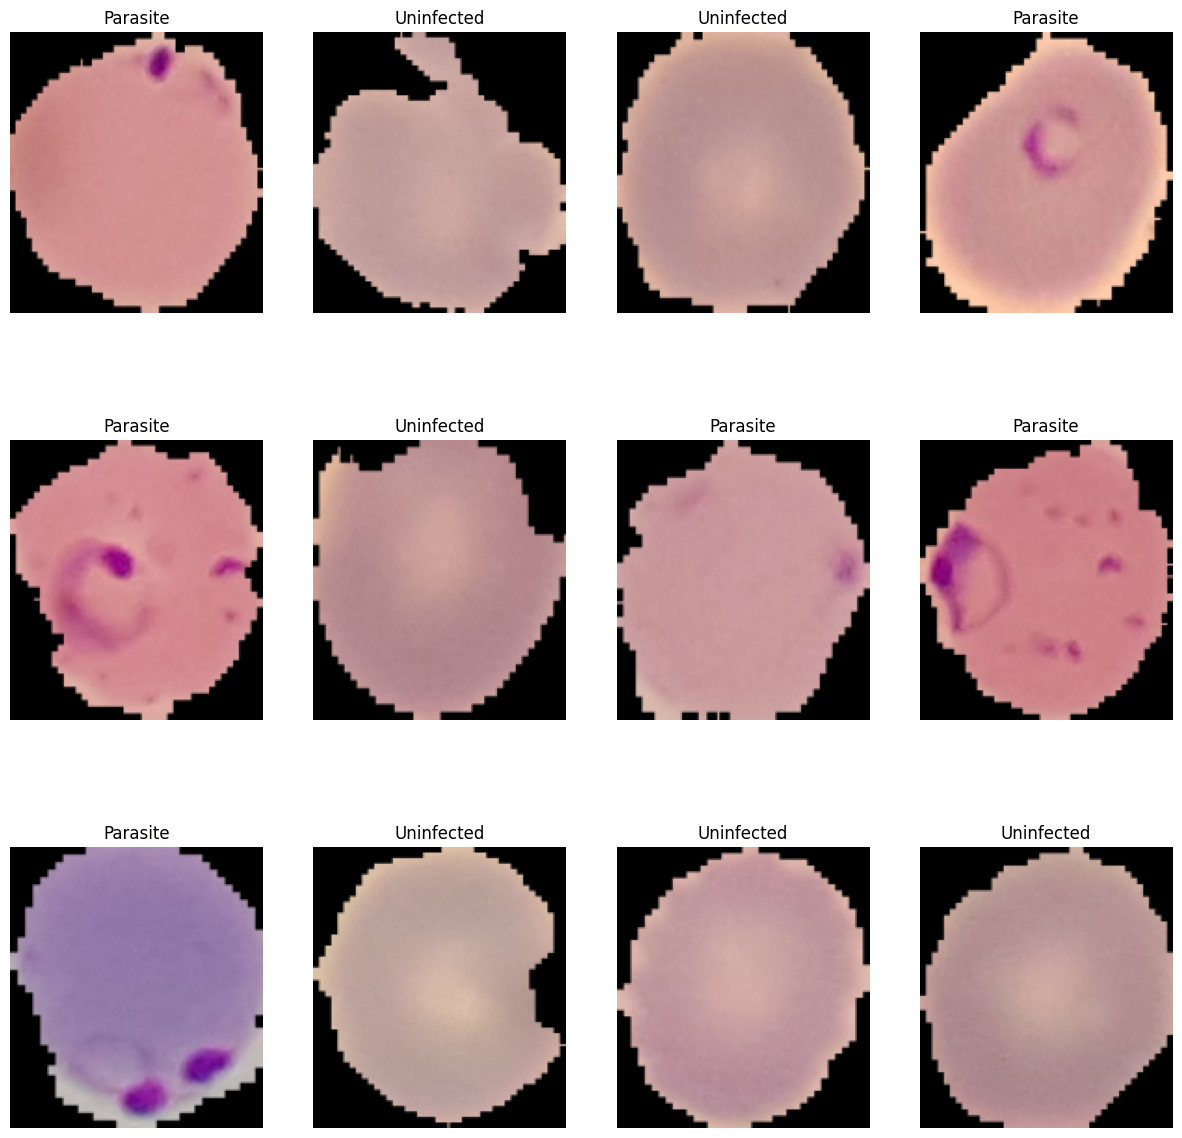

In [66]:
plt.figure(figsize = (15,15))
for image, label in train_dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classnames[label[i]])
        plt.axis('off')

In [67]:
def split_data(ds, train_ratio = .9, shuffle = True, shuffle_size = 1000):
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    ds_size = len(ds)
    train_size = int(ds_size * train_ratio)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size)
    
    return train_ds, val_ds
    

In [68]:
train_ds, val_ds = split_data(train_dataset)

In [69]:
len(train_ds), len(val_ds)

(11, 2)

In [70]:
# caching,shuffle and prefetching the data
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

## preprocessing

In [71]:
from tensorflow.keras import models, layers

In [72]:
# Image Preprocessing : Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(WIDTH, HEIGHT),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [73]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.3)
])

In [74]:
input_shape = (BATCH_SIZE, WIDTH, HEIGHT, CHANNELS)

In [75]:
input_shape

(32, 151, 136, 3)

In [76]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu', padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu',padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation= 'sigmoid')
    
])

In [77]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [78]:
history = model.fit(train_ds,
         epochs= EPOCHS,
         batch_size= BATCH_SIZE,
         verbose= 1,
         validation_data= val_ds)

Epoch 1/30
11/11 [==============================] - 15s 1s/step - loss: 1.0293 - accuracy: 0.4830 - val_loss: 0.6935 - val_accuracy: 0.4531
Epoch 2/30
11/11 [==============================] - 12s 1s/step - loss: 0.6927 - accuracy: 0.5398 - val_loss: 0.6983 - val_accuracy: 0.4531
Epoch 3/30
11/11 [==============================] - 12s 1s/step - loss: 0.6908 - accuracy: 0.5398 - val_loss: 0.6956 - val_accuracy: 0.4531
Epoch 4/30
11/11 [==============================] - 12s 1s/step - loss: 0.6833 - accuracy: 0.5398 - val_loss: 0.6755 - val_accuracy: 0.4531
Epoch 5/30
11/11 [==============================] - 12s 1s/step - loss: 0.6262 - accuracy: 0.6108 - val_loss: 0.5647 - val_accuracy: 0.8594
Epoch 6/30
11/11 [==============================] - 12s 1s/step - loss: 0.5594 - accuracy: 0.7784 - val_loss: 0.5007 - val_accuracy: 0.8594
Epoch 7/30
11/11 [==============================] - 12s 1s/step - loss: 0.5535 - accuracy: 0.7386 - val_loss: 0.6477 - val_accuracy: 0.6719
Epoch 8/30
11/11 [==

## MODEL EVALUATION 

In [79]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 1s 227ms/step - loss: 0.3620 - accuracy: 0.8881


In [80]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

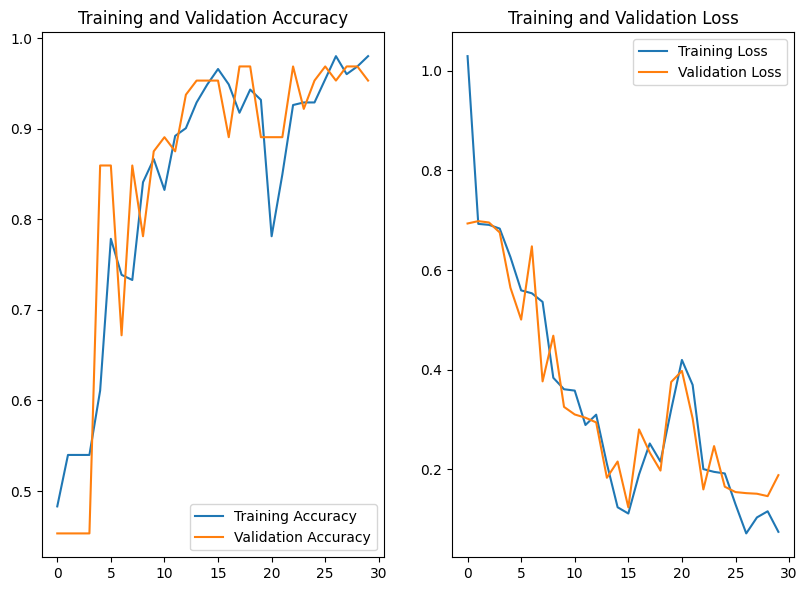

In [81]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [82]:
def predict_malaria(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)

    prediction = np.squeeze(model.predict(img_array))
    if prediction < .5:
        pred_class = classnames[0]
        confidence = np.round((1- prediction)* 100, 2)
    else:
        pred_class = classnames[1]
        confidence = np.round(prediction* 100, 2)
        
  
    return pred_class, confidence

1/1 [==============================] - 0s 34ms/step


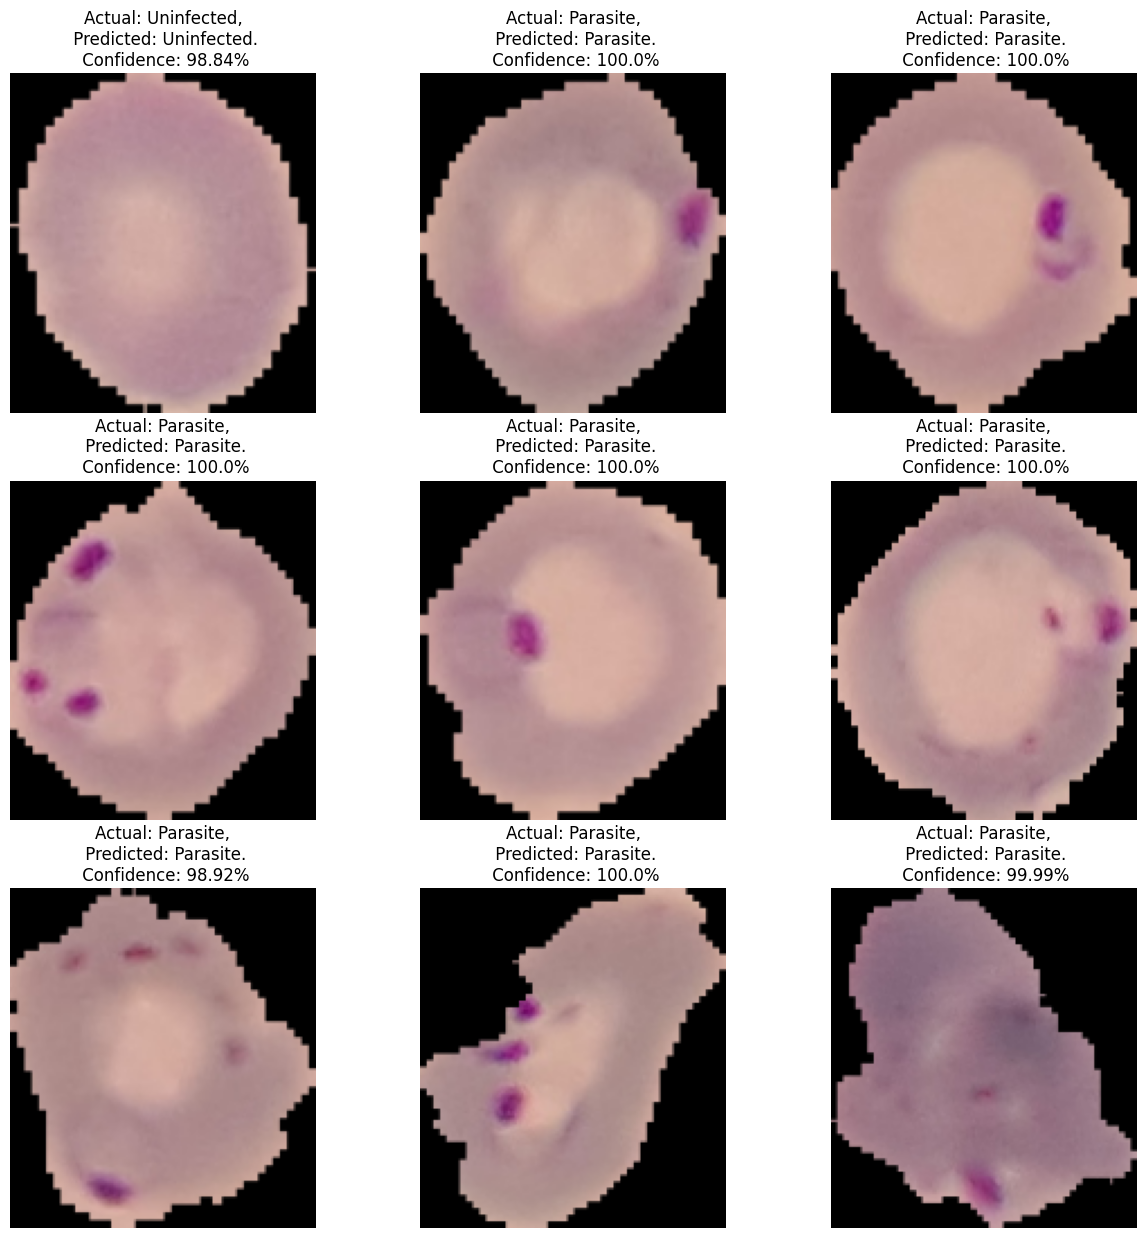

In [83]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict_malaria(model, images[i])
        actual_class = classnames[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")